<h1 style = "font-size:3rem;color:DarkCyan">Feature Comparison between audio files</h1>

In [69]:
#import libraries

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import librosa                  
import librosa.display 
import IPython.display as ipd
import scipy
import os
import pandas as pd

import sklearn

In [2]:
# import dataset, in this case different percussion sounds

filenames = os.listdir('./data')
print(f'Number of audio files: {len(filenames)} ')


Number of audio files: 167 


<h2 style = "font-size:2rem;color:DarkCyan">1. Extracting features</h2>

- Extracting features (Bandwidth, central spectroid, and zero-crossing rate) for each audio file, and store in a NxF matrix
- Giving a label

In [59]:
def extract_features(data):
    return [
        np.mean(librosa.feature.spectral_centroid(y = data)),
        np.mean(librosa.feature.spectral_bandwidth(y = data)),
        np.mean(librosa.feature.zero_crossing_rate(y = data))
    ]

#np.mean(librosa.feature.zero_crossing_rate(y = data)),

In [71]:
def get_label(name):
    if name.find('clap') != -1:
        return 1
    elif name.find('cymbal') != -1:
        return 2
    elif name.find('kick') != -1:
        return 3
    else:
        return 4

In [72]:
sr = 48000
features = np.zeros((len(filenames), 3))
labels = np.zeros(len(filenames))
#feature2=np.zeros((len(filenames), 3))
idx = 0

for name in filenames:
    data, dummy = librosa.load('./data/'+name, sr = sr, mono=True)
    
    # fill prediction array with correct label 
    labels[idx] = get_label(name)
    
    # extract features
    features[idx] = extract_features(data)
    
    idx +=1
    

<IPython.core.display.Javascript object>


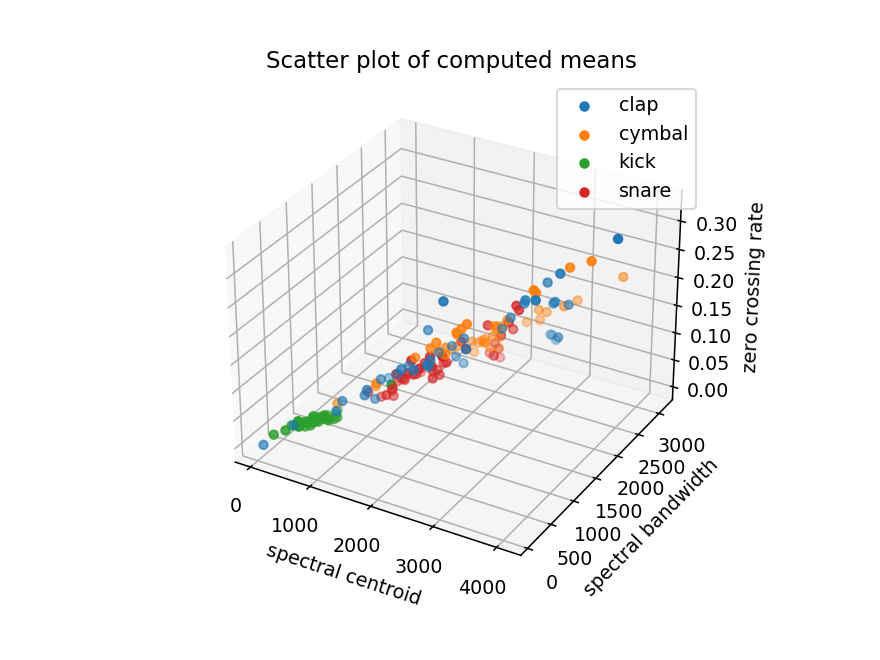

In [73]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 1),0], features[np.where(labels == 1),1], features[np.where(labels == 1),2], label = 'clap')
ax.scatter3D(features[np.where(labels == 2),0], features[np.where(labels == 2),1], features[np.where(labels == 2),2], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 3),0], features[np.where(labels == 3),1], features[np.where(labels == 3),2], label = 'kick')
ax.scatter3D(features[np.where(labels == 4),0], features[np.where(labels == 4),1], features[np.where(labels == 4),2], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel('spectral centroid')
ax.set_ylabel('spectral bandwidth')
ax.set_zlabel('zero crossing rate')
ax.legend()
#ax.tight_layout()

<h2 style = "font-size:2rem;color:DarkCyan">2. Scale features & plot again</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [65]:
print('Mean and std before scaling',np.mean(features, axis=0),np.std(features, axis=0))

features = sklearn.preprocessing.scale(features)

print('Mean and std after scaling',np.mean(features, axis=0),np.std(features, axis=0))

Mean and std before scaling [1.60794752e+03 1.46614746e+03 8.94566901e-02] [8.95756004e+02 7.02382780e+02 6.32586899e-02]
Mean and std after scaling [-9.67954924e-16 -3.90240069e-16 -5.63753967e-16] [1. 1. 1.]


<IPython.core.display.Javascript object>


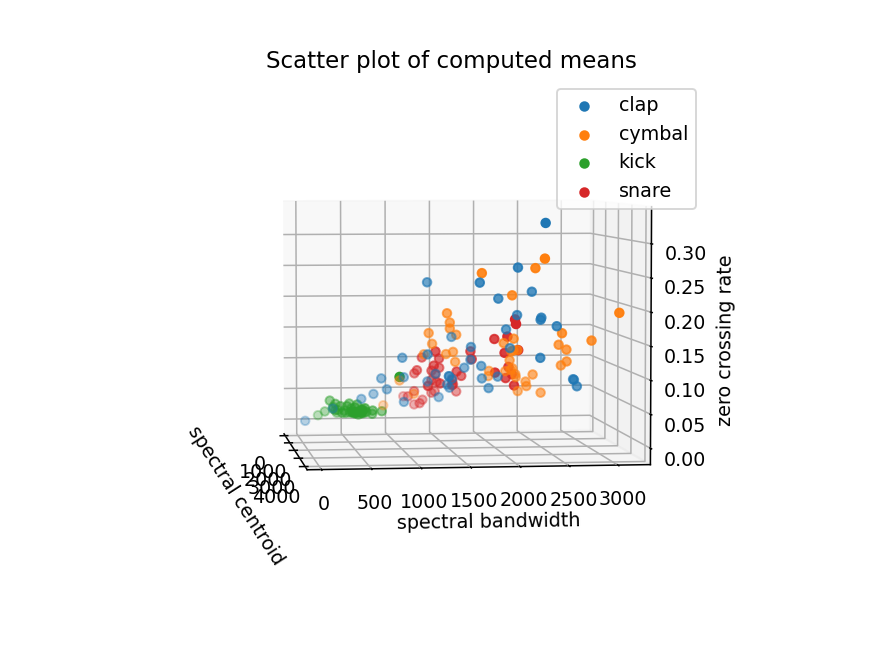

In [76]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 1),0], features[np.where(labels == 1),1], features[np.where(labels == 1),2], label = 'clap')
ax.scatter3D(features[np.where(labels == 2),0], features[np.where(labels == 2),1], features[np.where(labels == 2),2], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 3),0], features[np.where(labels == 3),1], features[np.where(labels == 3),2], label = 'kick')
ax.scatter3D(features[np.where(labels == 4),0], features[np.where(labels == 4),1], features[np.where(labels == 4),2], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel('spectral centroid')
ax.set_ylabel('spectral bandwidth')
ax.set_zlabel('zero crossing rate')
ax.legend()
#ax.tight_layout()

<h2 style = "font-size:2rem;color:DarkCyan">3. Save Features</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [75]:
#merging everything into a single data structure
dataset = pd.DataFrame(features)
dataset.columns = ['sc','bw','zcr'] #naming the features
dataset['label'] = labels
dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
dataset.to_csv('dataset.csv')
dataset

,sc,bw,zcr,label,filename
0,3219.254616,1710.813090,0.238694,1.0,clap00.wav
1,3038.457668,2368.386016,0.181085,1.0,clap01.wav
2,2720.264807,2157.191087,0.186275,1.0,clap02.wav
3,3327.856732,2096.538541,0.261476,1.0,clap03.wav
4,1843.056337,1291.227415,0.120479,1.0,clap04.wav
...,...,...,...,...,...
162,2595.858912,2149.888325,0.178874,4.0,snare_37.wav
163,2267.113803,1965.655439,0.146732,4.0,snare_38.wav
164,2275.897906,2115.492958,0.103575,4.0,snare_39.wav
165,2516.246030,2192.857962,0.131215,4.0,snare_40.wav


<h2 style = "font-size:2rem;color:DarkCyan">4. Splitting dataset into training and test data</h2>